# Motivação

<p style="font-size:18px;">
Suponha que tenhamos um conjunto $D$ de observações, tal que $D = (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots, (\mathbf{x}_N, y_N)$.

Seja cada vetor de entrada $\mathbf{x}_i = x_1, x_2, \cdots, x_d$.

Talvez seja de nosso interesse modelar uma função $f$ que calcule a saída correta para qualquer entrada, ou seja, $f(\mathbf{x}) = y$, $\forall \mathbf{x}$ em $\mathbb{F}^d$.

Por vezes, tal modelagem não é viável de ser executada determinísticamente. Considere, por exemplo, que $\mathbf{x}$ seja um vetor de informações sobre um aluno, e $y$ seja a nota que ele irá tirar em uma prova. Por mais que você possa ter certas intuições sobre o relacionamento entre as variáveis, por exemplo, quanto mais horas de estudo maior tende a ser a nota, é difícil conseguir encontrar uma resposta exata para qualquer entrada.

Para tais tipos de problemas utilizamos algoritmos de Machine Learning, ou seja, um algoritmo que permita que a máquina encontre, a partir das observações, dentre o conjunto de todas as possíveis funções $h(\mathbf{x})$, a função $g(\mathbf{x})$ o mais próxima possível da função hipotética $f(\mathbf{x})$.
</p>

# Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerando um Conjunto de Dados

Vamos gerar um conjunto de dados onde as variáveis sejam propositalmente relacionadas, a partir de um conjunto de pesos específicados.

Após isso, adicionamos um ruído pseudo-aleatório nos dados para amenizar dar um efeito mais realista.

In [21]:
def gen_dataset():
    N = 200
    weights = np.array([2.0, 3.0, -1.0]) # w0, w1, w2
    noise_rate = 2.0
    np.random.seed(13)

    x1_x2 = np.random.rand(N, 2) * 10
    X = np.c_[np.ones(N), x1_x2]
    y_init = np.matmul(X, weights)
    noise = np.random.randn(N) * noise_rate
    y = y_init + noise

    dataset = pd.DataFrame({
        'x0': X[:, 0],
        'x1': X[:, 1],
        'x2': X[:, 2],
        'y': y
    })

    return dataset

--- Dataset Gerado (com ruído) ---
    x0        x1        x2          y
0  1.0  7.777024  2.375412  24.954708
1  1.0  8.242785  9.657492  17.749107
2  1.0  9.726011  4.534492  25.945103
3  1.0  6.090425  7.755265  14.203693
4  1.0  6.416133  7.220182  15.512019

Gerando o gráfico 3D do dataset...


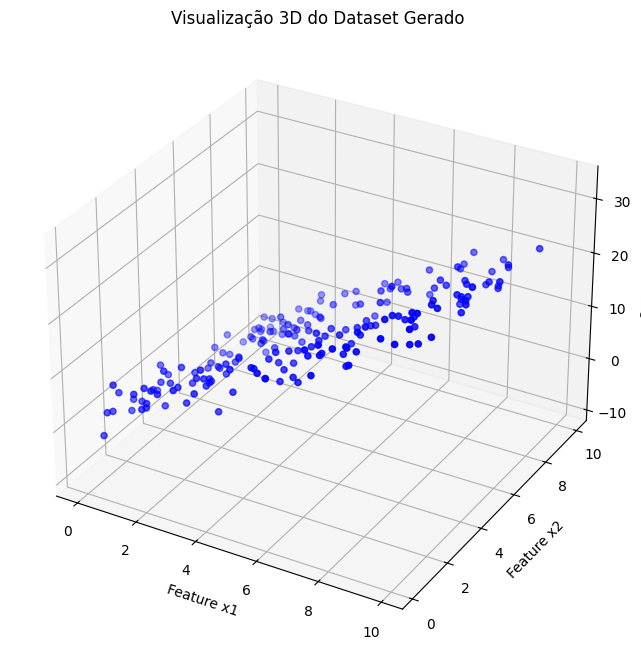

In [22]:
dataset = gen_dataset()

print("--- Dataset Gerado (com ruído) ---")
print(dataset.head())

print("\nGerando o gráfico 3D do dataset...")

# Cria a figura e um eixo 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota os pontos usando um gráfico de dispersão (scatter plot)
ax.scatter(dataset['x1'], dataset['x2'], dataset['y'], color='blue')

# Adiciona rótulos aos eixos para clareza
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Output y')

# Adiciona um título ao gráfico
ax.set_title('Visualização 3D do Dataset Gerado')

# Mostra o gráfico
plt.show()

# O Algoritmo de Regressão Linear

O algoritmo de regressão linear nos permite calcular uma função linear que aproxima o comportamento dos dados a partir das observações.

Na regressão linear, estamos buscando minimizar o erro quadrático $(h(\mathbf{x}) - f(\mathbf{x}))²$ para quaisquer $\mathbf{x}$ fora do conjunto de observações.

$E_{\text{out}}(h) = \mathbb{E}[(h(\mathbf{x}_n) - y_n)²]$.

Como não temos acesso a distribuição de probabilidade $P(\mathbf{x}, y)$ que gera os dados, só podemos nos basear nas observações.

O erro médio das observações é:
$E_{\text{in}}(h) = \frac{1}{N} \sum_{n = 1}^{N} (h(\mathbf{x}_n) - y_n)²$.

Como a função retornada $h$ é uma função linear dos elementos de $\mathbf{x}$, temos:

$h(\mathbf{x}) = \sum_{i = 0}^{d} w_i x_i = \mathbf{w}^T \mathbf{x}$.

Desenvolvendo a expressão $E_{\text{in}}$, teremos:

$E_{\text{in}}(h) = \frac{1}{N} \sum_{n = 1}^{N} (h(\mathbf{x}_n) - y_n)² = \frac{1}{N} ||X \mathbf{w} - \mathbf{y}||²$.

Podemos encarar a matrix de entradas $X$ e o vetor de saídas $\mathbf{y}$ como constantes, e então minimizar o erro utilizando o vetor de pesos $\mathbf{w}$ como variável.

Para isso, iremos calcular o grandiente de $E_{\text{in}}(\mathbf{w})$:

$\nabla E_{\text{in}}(\mathbf{w}) = \frac{2}{N} X^T(X \mathbf{w} - \mathbf{y})$.

Como queremos que esse gradiente seja $0$, temos:

$X^T X \mathbf{w} = X^T \mathbf{y}$.

Assim temos:

$\mathbf{w} = X^\dagger \mathbf{y}$,

Onde $X^\dagger = (X^T X)^{-1} X^T$.

O retorno da função de regressão linear é o vetor de pesos $\mathbf{w}$.

In [23]:
def lin_reg(dataset):
    X = dataset[['x0', 'x1', 'x2']].to_numpy()
    y = dataset['y'].to_numpy()

    # Criando a matriz pseudo-inversa
    X_p_i = np.matmul(np.linalg.inv((np.matmul(np.transpose(X), X))), np.transpose(X))

    # Retornando os pesos (w_lin)
    w_lin = np.matmul(X_p_i, y)

    return w_lin, X, y, X_p_i

A partir dos pesos $\mathbf{w}$, podemos gerar o plano correspondente a função linear $g(\mathbf{x})$.

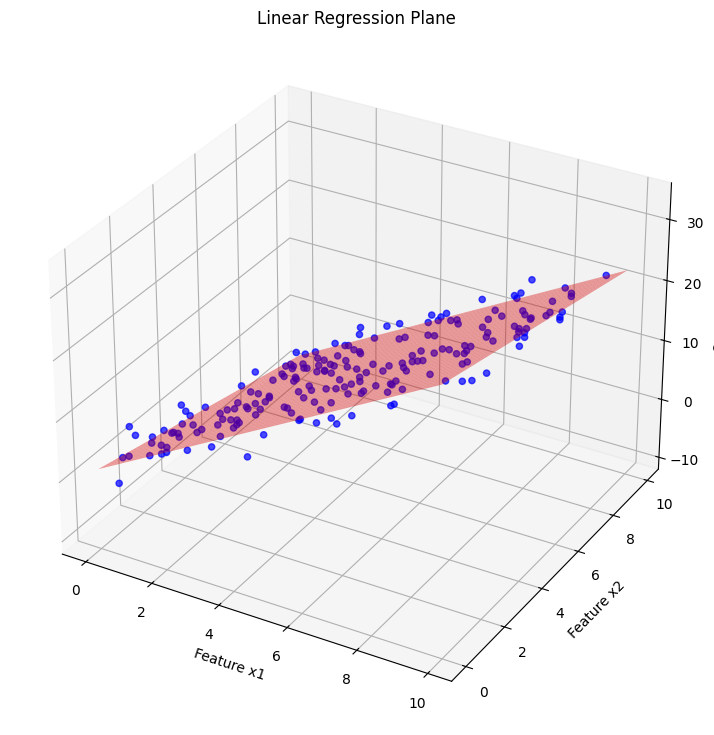

In [24]:
weights, X, y, X_p_i = lin_reg(dataset)

y_new = np.matmul(X, weights)

x1_surf = np.arange(0, 10, 0.1) # Range
x2_surf = np.arange(0, 10, 0.1) # Range
xx1, xx2 = np.meshgrid(x1_surf, x2_surf)

X_surf = np.c_[np.ones(xx1.size), xx1.flatten(), xx2.flatten()]

y_surf_flat = np.matmul(X_surf, weights)

y_surf = y_surf_flat.reshape(xx1.shape)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], dataset['y'], color='blue', alpha=0.7)
ax.plot_surface(xx1, xx2, y_surf, color='red', alpha=0.4)
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Output y')
ax.set_title('Linear Regression Plane')
plt.show()
